<a href="https://colab.research.google.com/github/fujitako03/AppropriateHeight/blob/main/Stable_Diffution2_1%E3%83%81%E3%83%A5%E3%83%BC%E3%83%88%E3%83%AA%E3%82%A2%E3%83%AB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ChatGPT（Pychatgpt）→Stable Diffusion2.1

## GPU設定
「編集 → ノートブックの設定」で「GPU」を選択

In [1]:
# GPUのタイプを確認
!nvidia-smi

Sun Jan  1 13:14:21 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P0    31W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## diffusersパッケージをインストール


In [1]:
# Stable Diffusionパッケージをインストール
!pip install --upgrade diffusers[torch] transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 524 kB 12.4 MB/s 
     |████████████████████████████████| 5.8 MB 55.7 MB/s 
     |████████████████████████████████| 182 kB 67.3 MB/s 
     |████████████████████████████████| 7.6 MB 59.9 MB/s 
     |████████████████████████████████| 191 kB 75.5 MB/s 


## PyChatGPTライブラリをインストール
Stable Diffutionのプロンプトを日本語で生成するためにChatGPTを利用
[公式リポジトリ](https://github.com/terry3041/pyChatGPT#how-do-i-get-it-to-work-on-google-colab)の手順に従ってインストール。クラッシュするが、想定通りなので無視して進める。

In [5]:
# install dependencies
!apt install chromium-browser xvfb
!pip install -U selenium_profiles pyChatGPT

# install chromedriver
from selenium_profiles.utils.installer import install_chromedriver
install_chromedriver()

Reading package lists... Done
Building dependency tree       
Reading state information... Done
chromium-browser is already the newest version (108.0.5359.71-0ubuntu0.18.04.5).
xvfb is already the newest version (2:1.19.6-1ubuntu4.13).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Stable Diffusinoのパイプラインを準備

In [3]:
from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler
import torch

# 利用するモデルを選択
model_id = "stabilityai/stable-diffusion-2-1"

# パイプラインを作成
pipe = StableDiffusionPipeline.from_pretrained(
    model_id, 
    scheduler=EulerDiscreteScheduler.from_pretrained(
        model_id, 
        subfolder="scheduler"
    ), 
    torch_dtype=torch.float16
).to("cuda")
pipe.enable_attention_slicing()

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

## pyChatGPTの認証
公式の[README](https://github.com/terry3041/pyChatGPT)に従ったが、結局うまくいっていない

In [ ]:
from pyChatGPT import ChatGPT
 
# 認証情報
session_token = 'xxxx'

# 認証
api = ChatGPT(session_token, verbose=True) 

# テスト実行
resp = api.send_message('こんにちは!')
print(resp['message']) 

# リセット
api.refresh_chat_page()  

## pyChatGPTを使って日本語文章からプロンプトの生成
結局pyChatGPTの動作確認できていないので、普通にOpenAIのでもページからプロンプトを生成した


In [ ]:
text_ja = ""

resp = api.send_message(text_ja)
prompt = resp['message']
print(prompt)

In [36]:
# OpenAIのChatGPTページで作成
input = "「たくさんのものから大事なものを選択し、それに集中する」というタイトルである、明るい印象の絵画をStable Diffusionで作ることができる、英語の長文プロンプトを教えてください"
prompt = 'This painting is meant to convey a positive and uplifting message about the power of choice and concentration in shaping our lives and guiding our paths. The title, "Selecting the Important Things and Focusing on Them," refers to the process of sifting through many options and honing in on what is most meaningful to us. The abstract forms and patterns in the painting should evoke a sense of movement and flow, suggesting the continuous process of selection and adaptation that we go through as we navigate the world and make our way in it. The colors and textures should be bright and vibrant, reflecting the joy and energy that come from focusing on what is important to us. The overall composition should be lively and dynamic, conveying a sense of optimism and hope for the future.'
print("入力:",input)
print("出力:",prompt)

入力: 「たくさんのものから大事なものを選択し、それに集中する」というタイトルである、明るい印象の絵画をStable Diffusionで作ることができる、英語の長文プロンプトを教えてください
出力: This painting is meant to convey a positive and uplifting message about the power of choice and concentration in shaping our lives and guiding our paths. The title, "Selecting the Important Things and Focusing on Them," refers to the process of sifting through many options and honing in on what is most meaningful to us. The abstract forms and patterns in the painting should evoke a sense of movement and flow, suggesting the continuous process of selection and adaptation that we go through as we navigate the world and make our way in it. The colors and textures should be bright and vibrant, reflecting the joy and energy that come from focusing on what is important to us. The overall composition should be lively and dynamic, conveying a sense of optimism and hope for the future.


## プロンプトから画像の生成

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['sense of movement and flow, suggesting the continuous process of selection and adaptation that we go through as we navigate the world and make our way in it. the colors and textures should be bright and vibrant, reflecting the joy and energy that come from focusing on what is important to us. the overall composition should be lively and dynamic, conveying a sense of optimism and hope for the future.']


  0%|          | 0/50 [00:00<?, ?it/s]

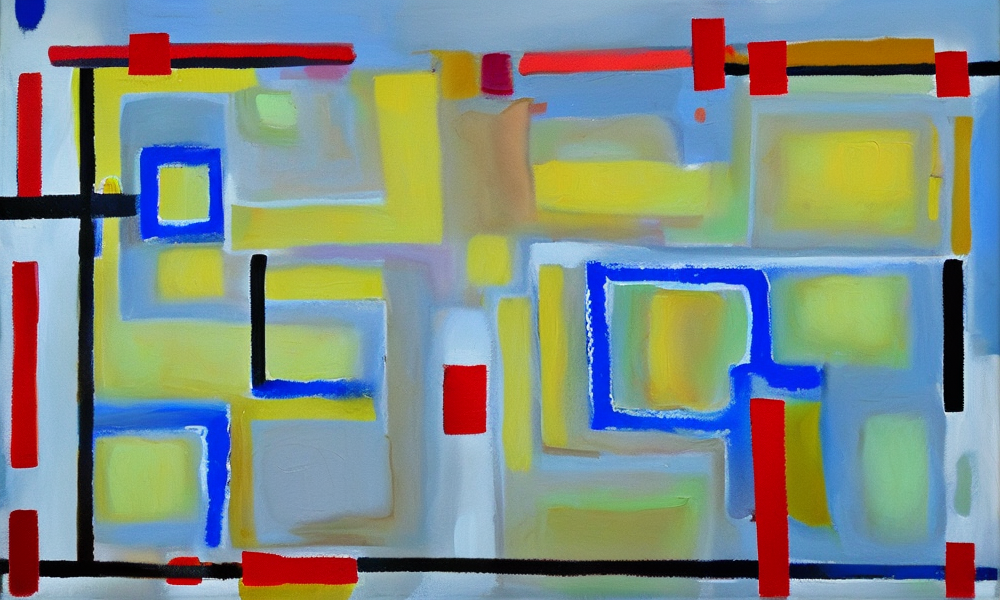

In [37]:
image = pipe(prompt, height=600, width=1000).images[0]
image